<a href="https://colab.research.google.com/github/yousseftebourbi/Bitcoin-Price-Prediction-using-LSTM-and-Technical-Indicators/blob/main/Bitcoin_Price_Prediction_using_LSTM_and_Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install pandas_ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data= yf.download(tickers='BTC-USD', period='max', interval='1d')
data.head(-10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427
2023-07-05,30778.724609,30877.330078,30225.613281,30514.166016,30514.166016,12481622280


In [16]:
dfpl = data[0:100]
import plotly.graph_objects as go
fig = go.Figure(data=go.Candlestick(x=dfpl.index,
open=dfpl['Open'],
high=dfpl['High'],
low=dfpl['Low'],
close=dfpl['Close'],
increasing_line_color= ' yellow', decreasing_line_color= 'blue'))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [3]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,221.968994,240.259003,221.261993,235.427002,50.019072,229.312807,288.640505,327.932773,21.793015,1,257.321014
1,235.528000,259.808014,235.528000,257.321014,58.174526,231.980256,288.020317,326.997518,-22.681992,0,234.824997
2,257.506989,265.610992,227.684006,234.824997,49.315763,232.251183,286.966944,325.776690,-0.981995,0,233.843002
3,234.824997,239.520996,229.022003,233.843002,48.967016,232.402785,285.914985,324.559025,10.188004,1,243.610001
4,233.421997,245.774994,232.313995,243.610001,52.543343,233.470139,285.077263,323.486853,-7.453995,0,236.326004
5,243.779999,244.251007,232.339996,236.326004,49.757135,233.742126,284.111891,322.332404,3.873001,1,240.283005
6,236.410004,242.671997,235.591995,240.283005,51.261414,234.365067,283.243992,321.245657,3.528000,1,243.779007
7,240.251007,247.100998,239.298996,243.779007,52.604668,235.261633,282.462508,320.219609,0.781998,1,244.533997
8,243.751999,255.320007,243.184006,244.533997,52.904994,236.144715,281.711448,319.217151,-8.567001,0,235.977005
9,244.544006,246.391998,233.850998,235.977005,49.124904,236.128743,280.805815,318.114632,2.897003,1,238.891998


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 5.10015892e-01
  1.00000000e+00 6.95198463e-04]
 [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 5.07025701e-01
  0.00000000e+00 3.61213277e-04]
 [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 5.08484658e-01
  0.00000000e+00 3.46634179e-04]
 ...
 [4.64282857e-01 4.57347899e-01 4.49768772e-01 ... 5.06131866e-01
  0.00000000e+00 4.46658989e-01]
 [4.47310134e-01 4.40218765e-01 4.54257514e-01 ... 5.05300645e-01
  0.00000000e+00 4.45966050e-01]
 [4.46800620e-01 4.40653082e-01 4.51631548e-01 ... 5.06798156e-01
  0.00000000e+00 4.45402002e-01]]


In [6]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3076
[[[1.76730917e-04 2.39565673e-04 3.27805591e-04 ... 0.00000000e+00
   8.54480830e-04 1.51359471e-03]
  [3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  ...
  [1.27798407e-03 1.06839020e-03 1.40287839e-03 ... 6.48253253e-04
   6.50589741e-04 1.12452129e-03]
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.53432005e-04 1.11884086e-03]
  [1.10446037e-03 9.11664784e-04 1.23006863e-03 ... 6.86809311e-04
   6.54969078e-04 1.11235768e-03]]

 [[3.78083351e-04 5.24678857e-04 5.43361175e-04 ... 4.23545789e-05
   8.43149654e-04 1.49563545e-03]
  [7.04473276e-04 6.09312584e-04 4.24840499e-04 ... 4.66564543e-05
   8.23903952e-04 1.47219246e-03]
  [3.67643695e-04 2.28802192e-04 4.45057286e-04 ... 4.90636352e-05
   8.04684075e-04 1.44881023e-03]
  ...
  [1.24815020e-03 1.03061587e-03 1.29596208e-03 ... 6.71235777e-04
   6.

In [7]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2436
(2436, 30, 8)
(610, 30, 8)
(2436, 1)
(610, 1)
[[1.18916794e-03]
 [1.11362965e-03]
 [6.80025381e-04]
 ...
 [9.49360564e-01]
 [9.54016191e-01]
 [9.68822705e-01]]


In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
147/147 [==============================] - 8s 38ms/step - loss: 6.8914e-04 - val_loss: 0.0128
Epoch 2/30
147/147 [==============================] - 7s 46ms/step - loss: 2.8764e-04 - val_loss: 0.0030
Epoch 3/30
147/147 [==============================] - 5s 35ms/step - loss: 2.4191e-04 - val_loss: 0.0146
Epoch 4/30
147/147 [==============================] - 6s 41ms/step - loss: 2.1462e-04 - val_loss: 0.0101
Epoch 5/30
147/147 [==============================] - 6s 39ms/step - loss: 2.1484e-04 - val_loss: 0.0036
Epoch 6/30
147/147 [==============================] - 7s 51ms/step - loss: 2.1133e-04 - val_loss: 0.0062
Epoch 7/30
147/147 [==============================] - 6s 39ms/step - loss: 1.7496e-04 - val_loss: 0.0019
Epoch 8/30
147/147 [==============================] - 5s 35ms/step - loss: 1.6837e-04 - val_loss: 0.0058
Epoch 9/30
147/147 [==============================] - 7s 46ms/step - loss: 1.8411e-04 - val_loss: 0.0054
Epoch 10/30
147/147 [==============================] - 

In [9]:
y_pred = model.predict(X_test)
#y_test = ground truth
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

20/20 [==============================] - 1s 17ms/step
[0.965462] [0.94048136]
[0.97502935] [0.89005366]
[0.9503446] [0.89312339]
[0.8905104] [0.84226143]
[0.8990119] [0.85974222]
[0.8542389] [0.88316417]
[0.8642799] [0.86881187]
[0.89259154] [0.83256899]
[0.8810211] [0.85156921]
[0.8442032] [0.8324374]


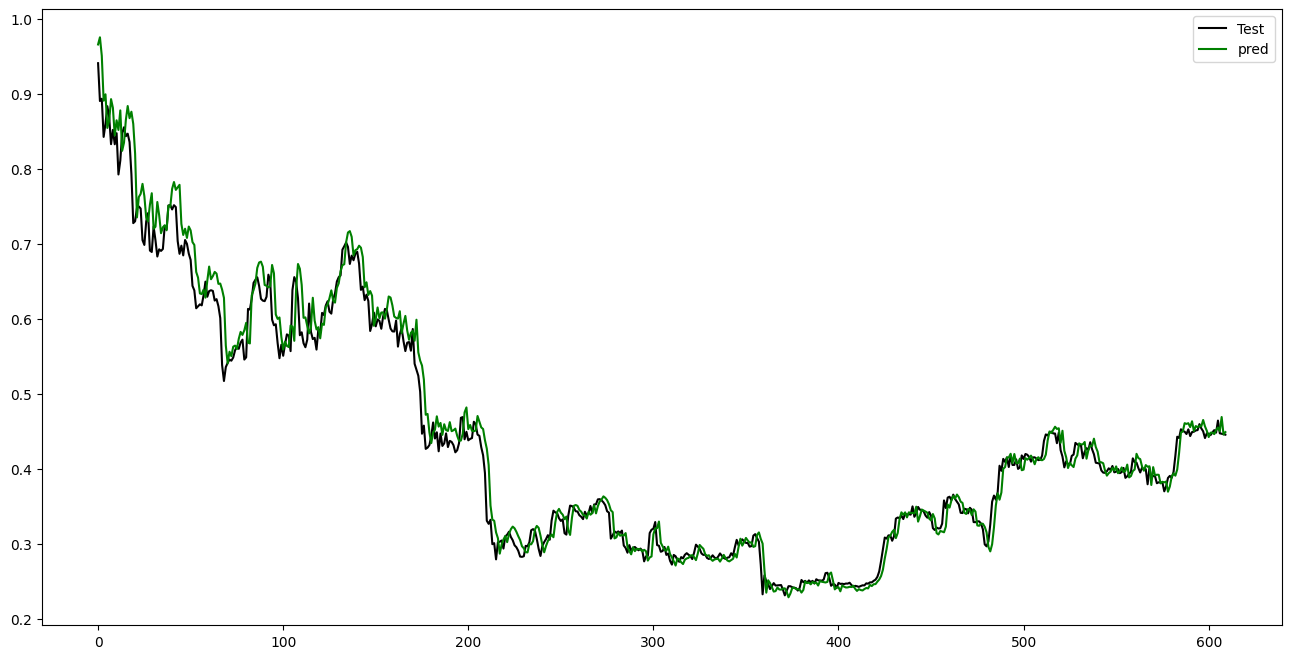

In [10]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()